In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [80]:
df=pd.read_csv("credit.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [82]:
df.columns.values

array(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30',
       'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90', 'pcircle', 'pdate'], dtype=object)

In [83]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [84]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In our dataset we have certain features like [Unnamed: 0,msisdn,pcircle,pdate] which will not help in building the model and hence they can be removed.

In [85]:
df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)

In [86]:
df.shape

(209593, 33)

In [87]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

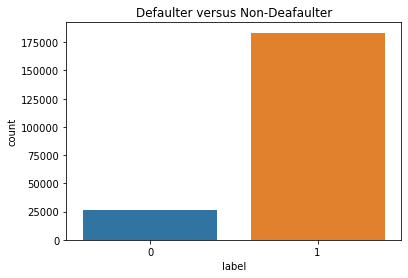

In [88]:
sns.countplot(x='label',data=df)
plt.title("Defaulter versus Non-Deafaulter")
plt.show()

In [89]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

Here we see that there is no missing values in the dataset.

# Feature Selection

# Checking the Correlation between the Independent Variables

<AxesSubplot:>

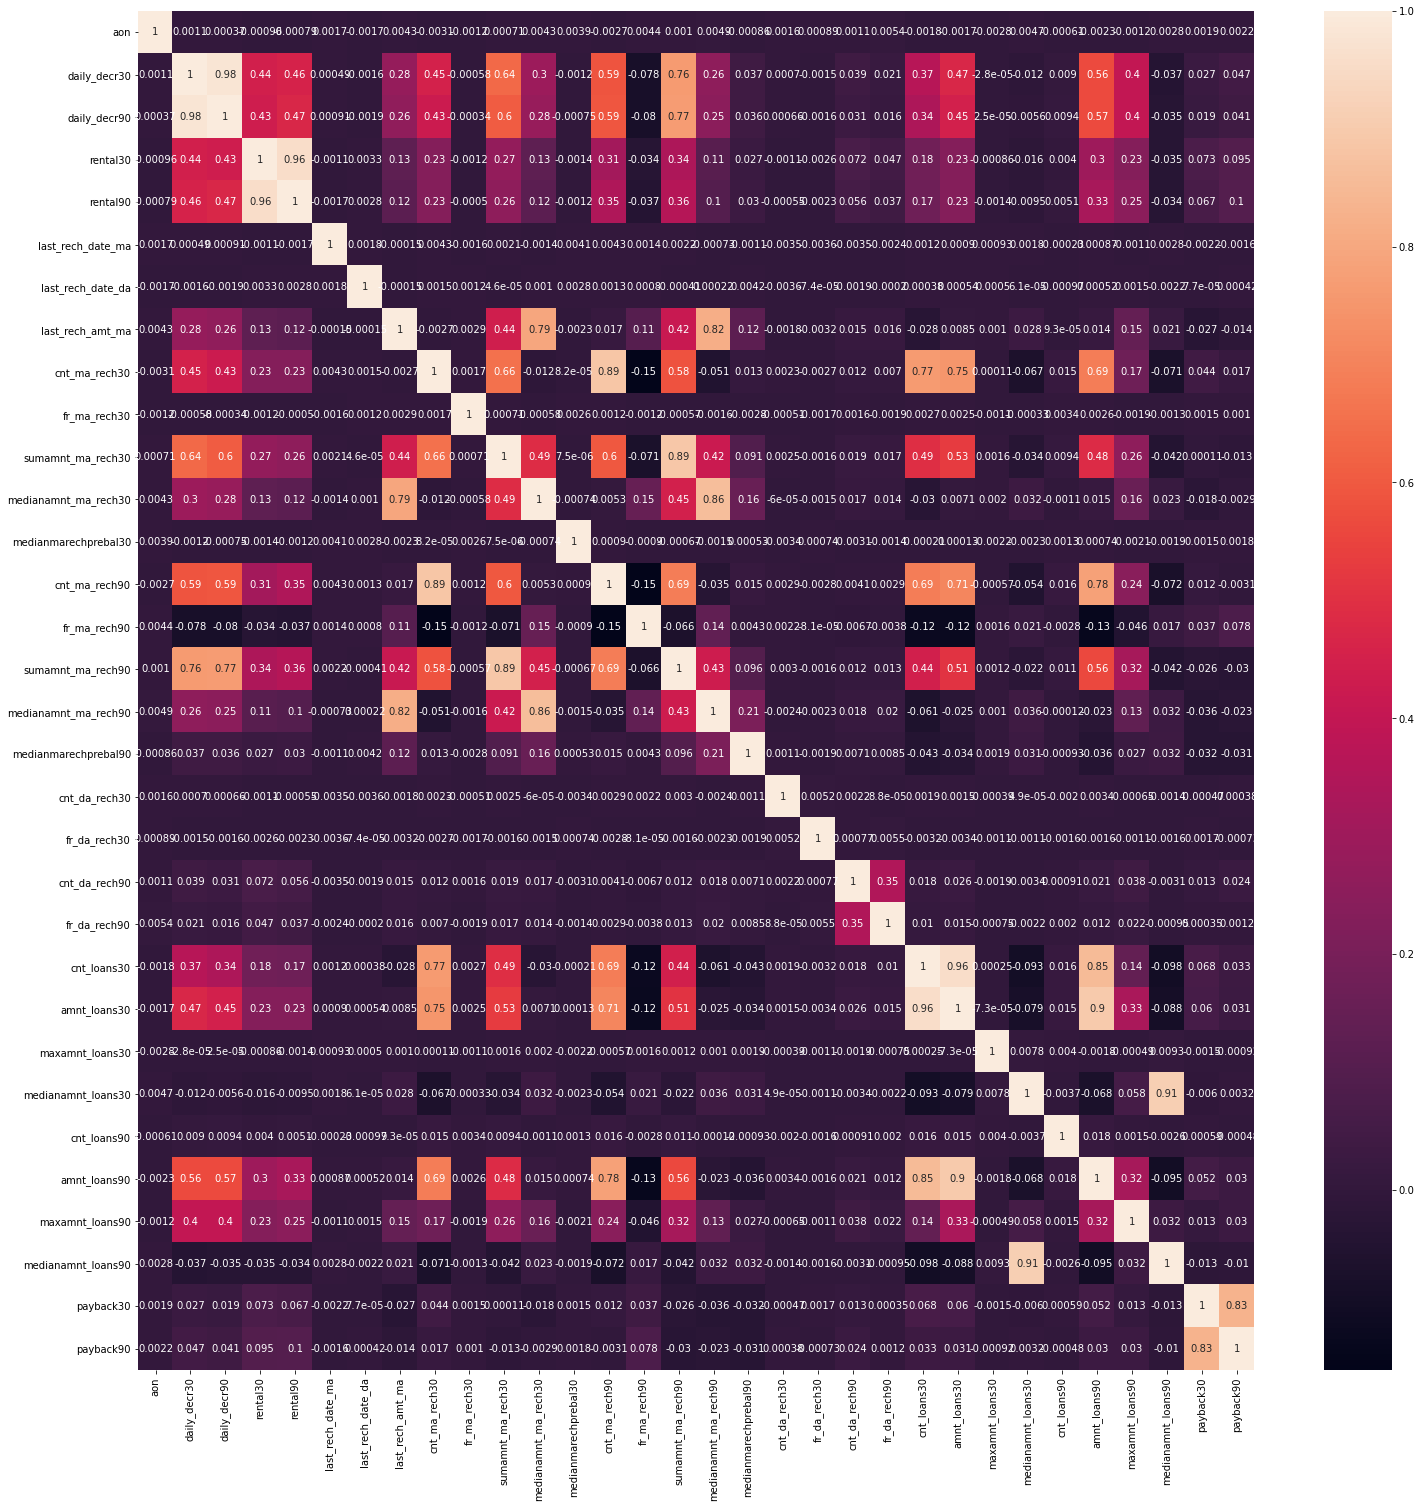

In [90]:
corr=df.iloc[:,1:].corr()
top_features=corr.index
plt.figure(figsize=(25,25))
sns.heatmap(df[top_features].corr(),annot=True)

In [91]:
threshold=0.85

In [92]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [93]:
correlation(df.iloc[:,1:],threshold)

{'amnt_loans30',
 'amnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'rental90',
 'sumamnt_ma_rech90'}

Here we see that these features are highly correlated with the other independent variables and hence these can be dropped to reduce redundancy. 

In [94]:
df.drop(['amnt_loans30','amnt_loans90','cnt_ma_rech90','daily_decr90','medianamnt_loans90','medianamnt_ma_rech90','rental90','sumamnt_ma_rech90'],axis=1,inplace=True)

In [95]:
df.shape

(209593, 25)

# Feature Selection Using ExtraTreesClassifier

In [96]:
X=df.iloc[:,1:]
y=df['label']

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [98]:
print(model.feature_importances_)

[0.10935131 0.1960641  0.12214697 0.06700863 0.00416137 0.04106233
 0.05350133 0.02125268 0.04355068 0.03840952 0.05388614 0.05214037
 0.06454498 0.00290294 0.00200963 0.00321703 0.00102472 0.03697564
 0.00245474 0.00749804 0.01695273 0.01162783 0.02177906 0.0264772 ]


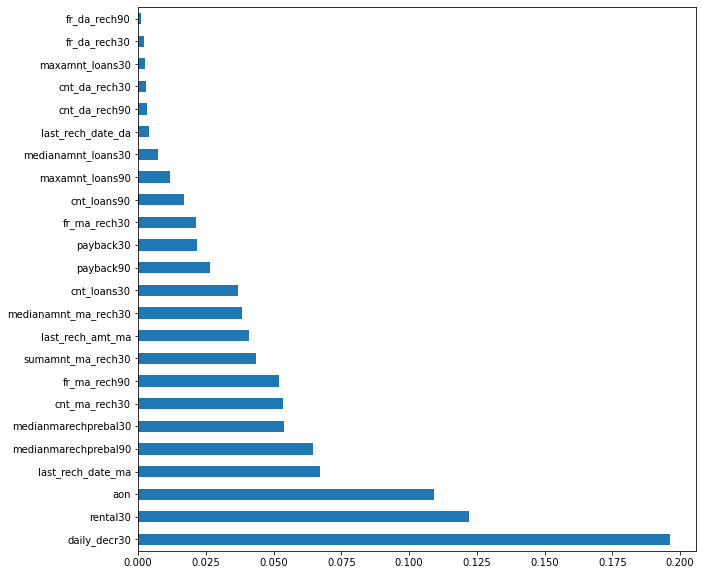

In [99]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(figsize=(10,10))
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

# Feature Selection Using mutual_info_classif

In [100]:
from sklearn.feature_selection import mutual_info_classif

In [101]:
mutual_info=mutual_info_classif(X,y)

In [102]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

daily_decr30            0.111242
sumamnt_ma_rech30       0.072029
cnt_ma_rech30           0.067777
last_rech_date_ma       0.052359
cnt_loans90             0.051750
cnt_loans30             0.050939
payback90               0.050053
medianmarechprebal30    0.049673
medianmarechprebal90    0.047263
medianamnt_ma_rech30    0.047104
last_rech_amt_ma        0.046543
payback30               0.045336
fr_ma_rech90            0.044079
rental30                0.043624
fr_ma_rech30            0.041810
maxamnt_loans90         0.031208
maxamnt_loans30         0.008853
aon                     0.007633
last_rech_date_da       0.000894
cnt_da_rech90           0.000751
fr_da_rech30            0.000570
medianamnt_loans30      0.000524
cnt_da_rech30           0.000364
fr_da_rech90            0.000006
dtype: float64

In [103]:
df.drop(['fr_da_rech90','fr_da_rech30','maxamnt_loans30','cnt_da_rech30','cnt_da_rech90','last_rech_date_da','medianamnt_loans30'],axis=1,inplace=True)

In [104]:
df.shape

(209593, 18)

# Checking Outliers

In [108]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.33421157, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 2.51768994, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.33421157, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 2.51768994, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 2.51768994, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 2.51768994, 0.38562959,
        0.41923266]])

In [109]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209580, 209580, 209580], dtype=int64), array([11, 11, 17, ...,  5,  9, 15], dtype=int64))


In [110]:
df_new=df[(z<3).all(axis=1)]

In [111]:
df_new.shape

(175902, 18)

In [112]:
df.shape

(209593, 18)

# Dividing data in Independent and Target Variables

In [113]:
x=df_new.iloc[:,1:]

In [114]:
y=df_new.iloc[:,0]

In [115]:
x.shape

(175902, 17)

In [116]:
y.shape

(175902,)

# Transforming Data to Remove Skewness:

In [117]:
from scipy.stats import skew

aon
0.9537200446613829


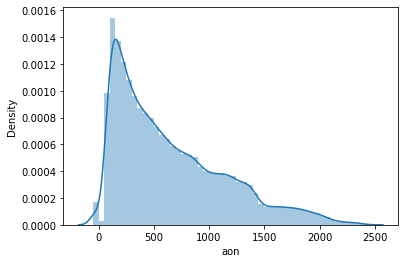

daily_decr30
1.9363058669551292


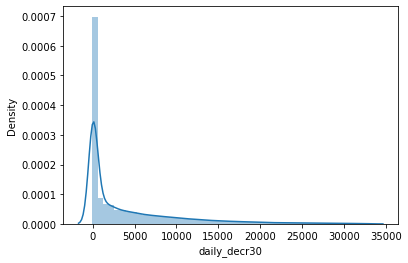

rental30
2.1475416101250198


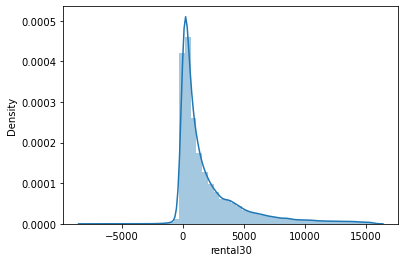

last_rech_date_ma
3.110046224652481


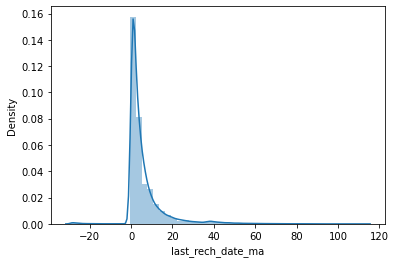

last_rech_amt_ma
2.1029615744837753


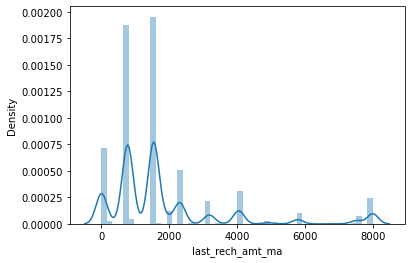

cnt_ma_rech30
1.191574829863967


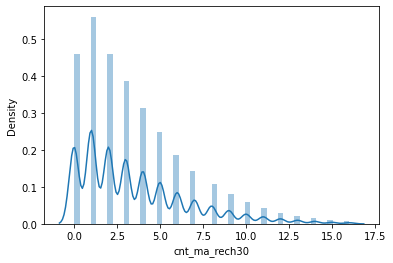

fr_ma_rech30
2.0112928225215696


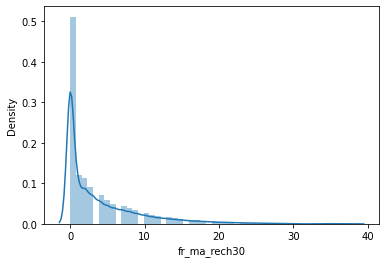

sumamnt_ma_rech30
1.604391154743788


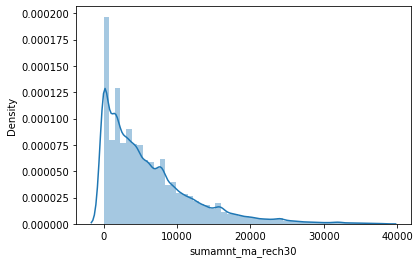

medianamnt_ma_rech30
2.305352393639478


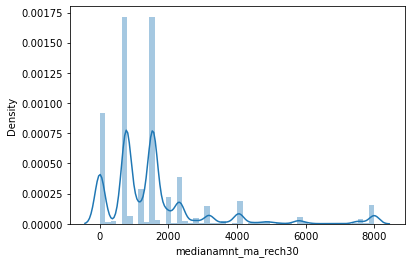

medianmarechprebal30
10.532902632822548


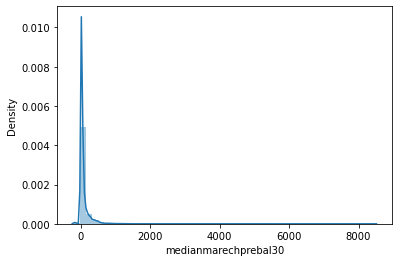

fr_ma_rech90
2.0018197750860436


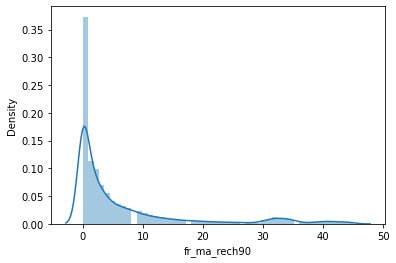

medianmarechprebal90
3.6603188335359884


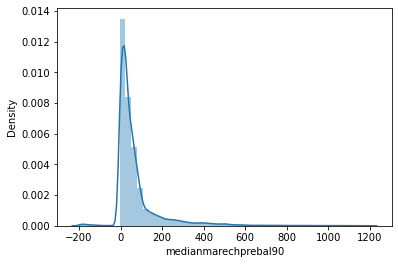

cnt_loans30
1.4833796816766502


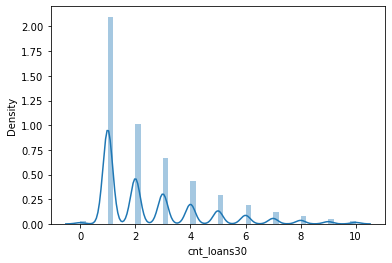

cnt_loans90
2.1984717058980148


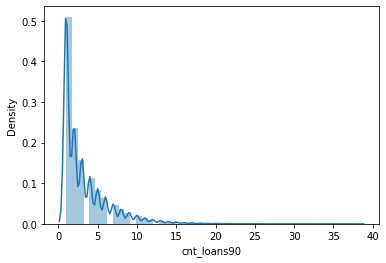

maxamnt_loans90
2.464170691049233


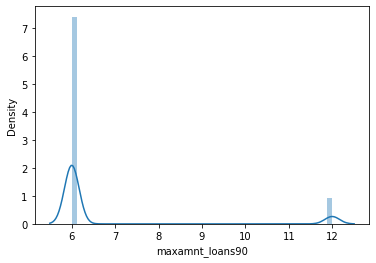

payback30
2.635991503715436


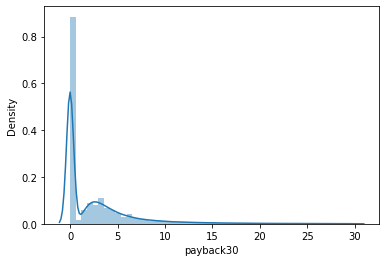

payback90
2.5542828047598842


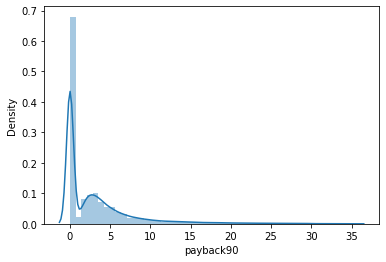

In [118]:
for col in x:
    print(col)
    print(skew(x[col]))
    
    plt.figure()
    sns.distplot(x[col])
    plt.show()

# Removing skewness

In [119]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [120]:
skew(x)

array([ 0.31032203, -1.79915713,  0.16548375,  0.11351866, -0.17854195,
       -0.02463106,  0.13725981, -0.45288647, -0.3041294 ,  1.97691264,
        0.14260915,  0.96605398,  0.0925441 ,  0.20172005,  2.46417069,
        0.30811337,  0.20851214])

# StandardScaler Transformation

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

# Treating Imbalance Data Using RandomOverSampler

In [123]:
y.value_counts()

1    152456
0     23446
Name: label, dtype: int64

In [124]:
x=pd.DataFrame(x)

In [125]:
x.shape

(175902, 17)

In [126]:
#pip install delayed

In [127]:
from imblearn.over_sampling import RandomOverSampler

In [128]:
os=RandomOverSampler()
x_sm,y_sm=os.fit_sample(x,y)

In [129]:
x_sm.shape

(304912, 17)

In [130]:
y_sm.shape

(304912,)

In [131]:
y_sm.value_counts()

1    152456
0    152456
Name: label, dtype: int64

# Building The Model

In [132]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Finding Best Random_State

In [133]:
maxAccu=0
BestRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        BestRS=i
        
print("Best Accuracy is :",maxAccu,"on Random_State",BestRS)

Best Accuracy is : 0.7702735203445787 on Random_State 99


We have found Best Random_State value as 120. We will create our train_test_split using this random_state(21)

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.20,random_state=BestRS)

In [135]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [136]:
eval(LogisticRegression())

0.769657117557352
[[23794  6773]
 [ 7274 23142]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     30567
           1       0.77      0.76      0.77     30416

    accuracy                           0.77     60983
   macro avg       0.77      0.77      0.77     60983
weighted avg       0.77      0.77      0.77     60983



In [137]:
eval(DecisionTreeClassifier())

0.9535116343899119
[[30511    56]
 [ 2779 27637]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30567
           1       1.00      0.91      0.95     30416

    accuracy                           0.95     60983
   macro avg       0.96      0.95      0.95     60983
weighted avg       0.96      0.95      0.95     60983



In [138]:
eval(RandomForestClassifier())

0.976419657937458
[[30494    73]
 [ 1365 29051]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30567
           1       1.00      0.96      0.98     30416

    accuracy                           0.98     60983
   macro avg       0.98      0.98      0.98     60983
weighted avg       0.98      0.98      0.98     60983



# Cross Validation

In [139]:
scr=cross_val_score(LogisticRegression(),x_sm,y_sm,cv=5)
print("Cross validating score of Logistic Regression model:",scr.mean())

Cross validating score of Logistic Regression model: 0.7669983500607054


In [140]:
scr=cross_val_score(DecisionTreeClassifier(),x_sm,y_sm,cv=5)
print("Cross validating score of DecisionTreeClassifier model:",scr.mean())

Cross validating score of DecisionTreeClassifier model: 0.953816186210644


In [141]:
scr=cross_val_score(RandomForestClassifier(),x_sm,y_sm,cv=5)
print("Cross validating score of RandomForestClassifier model:",scr.mean())

Cross validating score of RandomForestClassifier model: 0.9769638483378833


# Hyperparameter Tuning 

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
parameters={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy']}

In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [145]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [146]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [148]:
Final_Mod=DecisionTreeClassifier(criterion='gini',max_depth=9)
Final_Mod.fit(x_train,y_train)
pred=Final_Mod.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

0.8025515307544726

# AUC ROC Curve

In [159]:
from sklearn.metrics import plot_roc_curve

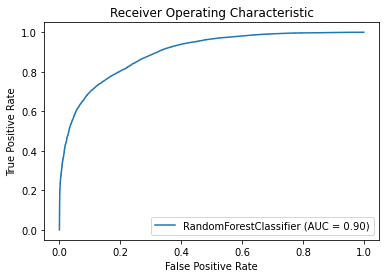

In [160]:
plot_roc_curve(Final_Mod,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Model Saving

In [161]:
import joblib
joblib.dump(Final_Mod,"FinalModel2.pkl")

['FinalModel2.pkl']